In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as sp

In [57]:
train_df=pd.read_csv('data/train.csv', parse_dates='Open Date')
test_df=pd.read_csv('data/test.csv', parse_dates='Open Date')
samplesub=pd.read_csv('data/sampleSubmission.csv', parse_dates='Open Date')

In [58]:
train_df.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4,4,2,...,3.0,5,3,4,5,5,4,3,4,5653753
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4,4,1,...,3.0,0,0,0,0,0,0,0,0,6923131
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2,5,2,...,3.0,0,0,0,0,0,0,0,0,2055379
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6,6,4,...,7.5,25,12,10,6,18,12,12,6,2675511
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3,4,2,...,3.0,5,1,3,2,3,4,3,3,4316715


### This step is going to convert the 'Open Date' column to a date object

In [59]:
train_df['Open Date'] = pd.to_datetime(train_df['Open Date'])
test_df['Open Date'] = pd.to_datetime(test_df['Open Date'])

### This step will calculate the difference of date from 1st Jan 2015

In [60]:
base=pd.to_datetime('2015-01-01')
train_df['OpenDate']=(base-train_df['Open Date'])
test_df['OpenDate']=(base-test_df['Open Date'])

### This step will just pick up the 'days' and convert this to an integer while store it in a new variable called OpenDate2

In [61]:
train_df['OpenDate2']= (train_df['OpenDate']/ np.timedelta64(1,'D')).astype(int)
test_df['OpenDate2']= (test_df['OpenDate']/ np.timedelta64(1,'D')).astype(int)

### This step will take the number of days and convert to year by dividing it by 365

In [62]:
train_df['OpenDate2']= (train_df['OpenDate2']/365)
test_df['OpenDate2']= (test_df['OpenDate2']/365)

In [63]:
train_df.drop(['Id','Open Date','OpenDate','City','City Group'], axis=1, inplace=True)
train_df.head()

,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P30,P31,P32,P33,P34,P35,P36,P37,revenue,OpenDate2
0,IL,4,5.0,4,4,2,2,5,4,5,...,5,3,4,5,5,4,3,4,5653753,15.471233
1,FC,4,5.0,4,4,1,2,5,5,5,...,0,0,0,0,0,0,0,0,6923131,6.884932
2,IL,2,4.0,2,5,2,3,5,5,5,...,0,0,0,0,0,0,0,0,2055379,1.816438
3,IL,6,4.5,6,6,4,4,10,8,10,...,25,12,10,6,18,12,12,6,2675511,2.915068
4,IL,3,4.0,3,4,2,2,5,5,5,...,5,1,3,2,3,4,3,3,4316715,5.652055


In [65]:
test_df.drop(['Id','Open Date','OpenDate', 'City','City Group'], axis=1, inplace=True)


ValueError: labels ['Id' 'Open Date' 'OpenDate' 'City' 'City Group'] not contained in axis

In [ ]:
%pylab inline
test_df.plot(x='Type', y='P1', kind='bar')

In [67]:
from sklearn.preprocessing import StandardScaler

In [72]:
dense_matrix = np.array(train_df.as_matrix(columns = None), dtype=bool).astype(np.int)


In [74]:
sparse_matrix = sp.sparse.csr_matrix(dense_matrix)

In [84]:
sparse_matrix

<137x40 sparse matrix of type '<class 'numpy.int64'>'
	with 3980 stored elements in Compressed Sparse Row format>

In [34]:
train_df.sort_index(ascending=[False,True], by = ['revenue', 'Type']).head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
16,16,01/07/2000,İstanbul,Big Cities,FC,3,5,4,4,2,...,2,0,0,0,0,0,0,0,0,19696939
75,75,10/15/2005,İstanbul,Big Cities,FC,5,5,4,5,1,...,0,0,0,0,0,0,0,0,0,16549064
99,99,12/18/1999,İstanbul,Big Cities,IL,4,5,4,4,2,...,1,5,5,4,2,5,5,5,3,13575224
100,100,09/21/2007,İstanbul,Big Cities,FC,3,5,4,4,2,...,3,0,0,0,0,0,0,0,0,9652350
133,133,10/12/2006,İzmir,Big Cities,FC,4,5,4,4,2,...,3,0,0,0,0,0,0,0,0,9262754


Populating the interactive namespace from numpy and matplotlib


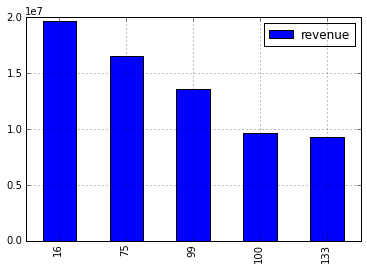

In [42]:
%pylab inline
top10=train_df.revenue.order(ascending=False).head()
type(top10)

plt.figure()
top10.plot(label='revenue', kind='bar')
xticks(rotation='vertical')
plt.legend()

In [54]:
train_group=train_df.groupby('Type')
for k,group in train_group:
    print( k)
    print( group)

DT
      Id   Open Date    City  City Group Type  P1  P2  P3  P4  P5   ...     \
124  124  08/18/2005  Ankara  Big Cities   DT   1   3   0   5   5   ...      

     P29  P30  P31  P32  P33  P34  P35  P36  P37  revenue  
124    3    0    0    0    0    0    0    0    0  3810007  

[1 rows x 43 columns]
FC
      Id   Open Date        City  City Group Type  P1   P2   P3   P4  P5  \
1      1  02/14/2008      Ankara  Big Cities   FC   4  5.0  4.0  4.0   1   
5      5  02/12/2010      Ankara  Big Cities   FC   6  6.0  4.5  7.5   8   
10    10  08/09/2013     Kocaeli       Other   FC   9  6.0  6.0  6.0   4   
13    13  10/16/2010    İstanbul  Big Cities   FC   4  5.0  4.0  4.0   1   
14    14  12/29/2011       Bursa       Other   FC   2  2.0  4.0  4.0   1   
16    16  01/07/2000    İstanbul  Big Cities   FC   3  5.0  4.0  4.0   2   
17    17  11/08/2009    İstanbul  Big Cities   FC   2  4.0  4.0  5.0   1   
21    21  01/25/2014    İstanbul  Big Cities   FC   5  5.0  4.0  4.0   2   
22    22  

In [57]:
test_df.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,0,01/22/2011,Niğde,Other,FC,1,4,4,4,1,...,2,3,0,0,0,0,0,0,0,0
1,1,03/18/2011,Konya,Other,IL,3,4,4,4,2,...,1,3,0,0,0,0,0,0,0,0
2,2,10/30/2013,Ankara,Big Cities,FC,3,4,4,4,2,...,2,3,0,0,0,0,0,0,0,0
3,3,05/06/2013,Kocaeli,Other,IL,2,4,4,4,2,...,2,3,0,4,0,0,0,0,0,0
4,4,07/31/2013,Afyonkarahisar,Other,FC,2,4,4,4,1,...,5,3,0,0,0,0,0,0,0,0


In [73]:
ni=train_df.City=='Ankara'
train_df[ni]

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131
5,5,02/12/2010,Ankara,Big Cities,FC,6,6.0,4.5,7.5,8,...,5.0,0,0,0,0,0,0,0,0,5017319
12,12,02/28/2013,Ankara,Big Cities,IL,2,2.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,1734634
26,26,02/23/2010,Ankara,Big Cities,IL,3,5.0,4.0,5.0,2,...,3.0,5,5,4,3,3,4,3,1,2267425
29,29,10/13/2006,Ankara,Big Cities,FC,1,1.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,3447890
36,36,05/09/2008,Ankara,Big Cities,FC,3,5.0,5.0,3.0,1,...,3.0,0,0,0,0,0,0,0,0,3028267
37,37,08/23/2010,Ankara,Big Cities,IL,2,3.0,4.0,3.0,1,...,3.0,5,5,5,3,4,4,3,1,2740687
43,43,09/24/2009,Ankara,Big Cities,FC,2,4.0,5.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,2732645
44,44,10/13/2004,Ankara,Big Cities,IL,2,3.0,5.0,3.0,1,...,3.0,3,5,5,2,3,4,3,4,4264176
50,50,05/01/2010,Ankara,Big Cities,IL,3,5.0,4.0,5.0,3,...,3.0,5,2,3,2,2,2,3,3,2156098


In [76]:
train_df[np.invert(ni)]

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715
6,6,10/11/2010,İstanbul,Big Cities,IL,2,3.0,4.0,4.0,1,...,3.0,4,5,2,2,3,5,4,4,5166635
7,7,06/21/2011,İstanbul,Big Cities,IL,4,5.0,4.0,5.0,2,...,2.0,0,0,0,0,0,0,0,0,4491607
8,8,08/28/2010,Afyonkarahisar,Other,IL,1,1.0,4.0,4.0,1,...,3.0,4,5,5,3,4,5,4,5,4952497
9,9,11/16/2011,Edirne,Other,IL,6,4.5,6.0,7.5,6,...,2.5,0,0,0,0,0,0,0,0,5444227
10,10,08/09/2013,Kocaeli,Other,FC,9,6.0,6.0,6.0,4,...,2.5,0,0,0,0,0,0,0,0,3745135
11,11,05/22/2012,İstanbul,Big Cities,IL,2,4.0,4.0,4.0,2,...,3.0,5,5,4,2,3,4,4,2,5161370


Populating the interactive namespace from numpy and matplotlib


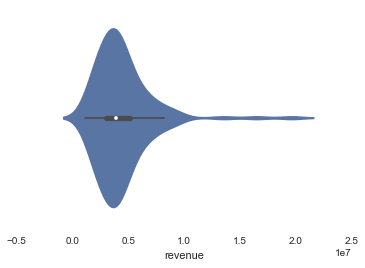

In [14]:
%pylab inline
sns.violinplot(train_df.revenue, shade=True)